## 필요한 모듈 import

In [28]:
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier

## 2015 ~ 2020년도 데이터 가져오기

In [4]:

filenames=['C:/workspace/p-tag/KBO_prediction_data/baseball_' + str(x) + '.csv' for x in list(range(2015,2021))]
filenames

['C:/workspace/p-tag/KBO_prediction_data/baseball_2015.csv',
 'C:/workspace/p-tag/KBO_prediction_data/baseball_2016.csv',
 'C:/workspace/p-tag/KBO_prediction_data/baseball_2017.csv',
 'C:/workspace/p-tag/KBO_prediction_data/baseball_2018.csv',
 'C:/workspace/p-tag/KBO_prediction_data/baseball_2019.csv',
 'C:/workspace/p-tag/KBO_prediction_data/baseball_2020.csv']

In [5]:
data = pd.DataFrame()
for filename in tqdm(filenames):
    temp = pd.read_csv(filename)
    data = pd.concat([data,temp])

100%|██████████| 6/6 [00:00<00:00, 33.79it/s]


In [6]:
baseball_data = data.copy()

## 날짜 데이터, HEADER_NO 삭제

In [7]:
baseball_data = baseball_data.drop(['G_ID','GDAY_DS','HEADER_NO'], axis=1)
baseball_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8656 entries, 0 to 1367
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   T_ID      8656 non-null   object 
 1   VS_T_ID   8656 non-null   object 
 2   TB_SC     8656 non-null   object 
 3   PA        8656 non-null   float64
 4   AB        8656 non-null   float64
 5   RBI       8656 non-null   float64
 6   RUN       8656 non-null   float64
 7   HIT       8656 non-null   float64
 8   H2        8656 non-null   int64  
 9   H3        8656 non-null   int64  
 10  HR        8656 non-null   float64
 11  SB        8656 non-null   int64  
 12  CS        8656 non-null   int64  
 13  SF        8656 non-null   int64  
 14  BB        8656 non-null   float64
 15  HP        8656 non-null   float64
 16  KK        8656 non-null   float64
 17  GD        8656 non-null   float64
 18  LOB       8656 non-null   float64
 19  P_HRA_RT  8656 non-null   float64
 20  P_AB_CN   8656 non-null   int6

## 무승부 제거

In [8]:
baseball_data = baseball_data[baseball_data['win']!=0.5]

## 팀 명 라벨 인코딩

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(baseball_data['T_ID'])
baseball_data.loc[:,'T_ID'] = le.transform(baseball_data['T_ID'])
baseball_data.loc[:,'VS_T_ID'] = le.transform(baseball_data['VS_T_ID'])
baseball_data.head()

,T_ID,VS_T_ID,TB_SC,PA,AB,RBI,RUN,HIT,H2,H3,...,HP,KK,GD,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,OBP,OOO,win
0,0,6,T,54.0,42.0,4.0,4.0,10.0,4,0,...,1.0,7.0,0.0,24.0,0.133333,15,2,0.352941,0.238095,0.0
1,6,0,B,46.0,40.0,5.0,5.0,8.0,4,0,...,0.0,7.0,1.0,18.0,0.090909,11,1,0.304348,0.200000,1.0
2,2,4,T,46.0,35.0,8.0,9.0,14.0,2,0,...,1.0,8.0,1.0,23.0,0.285714,14,4,0.511111,0.400000,0.0
3,4,2,B,42.0,37.0,12.0,12.0,14.0,10,0,...,1.0,8.0,1.0,17.0,0.437500,16,7,0.439024,0.378378,1.0
4,3,1,T,34.0,29.0,1.0,1.0,7.0,4,2,...,0.0,6.0,2.0,17.0,0.200000,10,2,0.333333,0.241379,0.0


## 데이터 형태가 object인 값(TB_SC)을 라벨 인코딩

In [11]:
le = LabelEncoder()
le.fit(baseball_data['TB_SC'])
baseball_data.loc[:,'TB_SC'] = le.transform(baseball_data['TB_SC'])
baseball_data.head()

,T_ID,VS_T_ID,TB_SC,PA,AB,RBI,RUN,HIT,H2,H3,...,HP,KK,GD,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,OBP,OOO,win
0,0,6,1,54.0,42.0,4.0,4.0,10.0,4,0,...,1.0,7.0,0.0,24.0,0.133333,15,2,0.352941,0.238095,0.0
1,6,0,0,46.0,40.0,5.0,5.0,8.0,4,0,...,0.0,7.0,1.0,18.0,0.090909,11,1,0.304348,0.200000,1.0
2,2,4,1,46.0,35.0,8.0,9.0,14.0,2,0,...,1.0,8.0,1.0,23.0,0.285714,14,4,0.511111,0.400000,0.0
3,4,2,0,42.0,37.0,12.0,12.0,14.0,10,0,...,1.0,8.0,1.0,17.0,0.437500,16,7,0.439024,0.378378,1.0
4,3,1,1,34.0,29.0,1.0,1.0,7.0,4,2,...,0.0,6.0,2.0,17.0,0.200000,10,2,0.333333,0.241379,0.0


## feature별 상관 관계(corr) 활용

<AxesSubplot:>

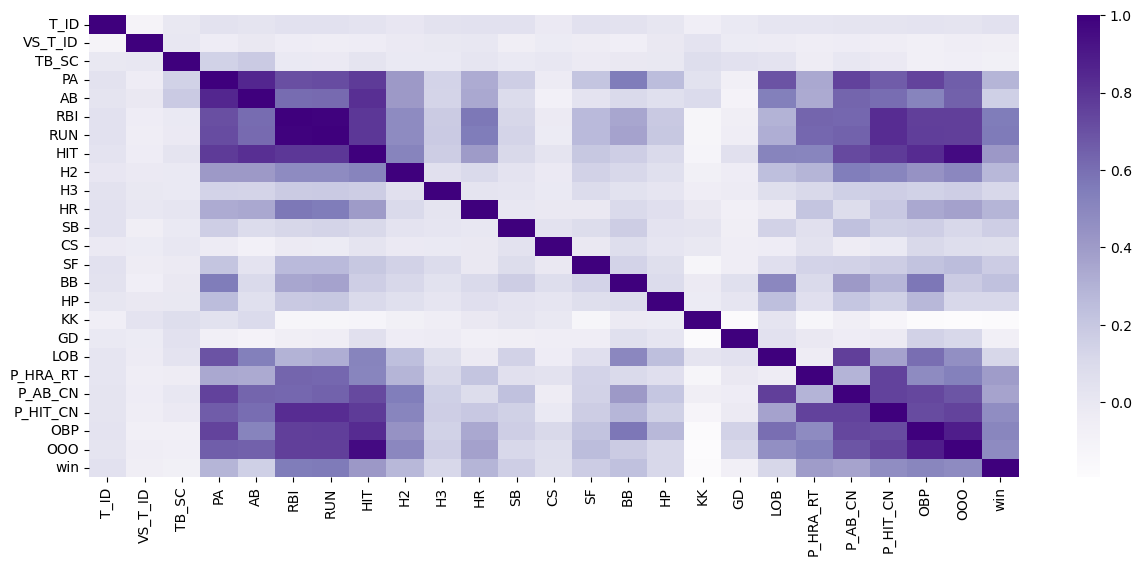

In [26]:
baseball_data_corr = baseball_data.corr()
plt.figure(figsize=(15,6))
sns.heatmap(baseball_data_corr, cmap='Purples')

<AxesSubplot:>

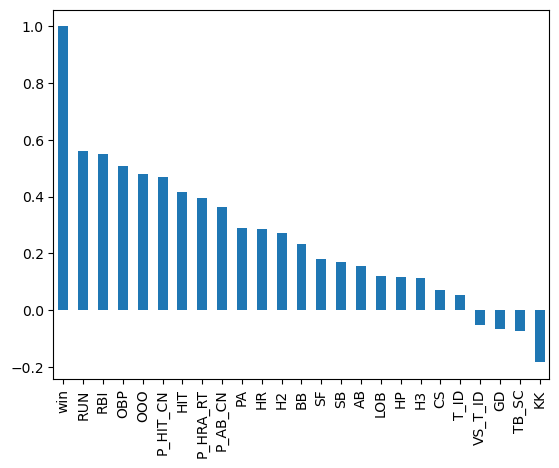

In [32]:
baseball_data_corr['win'].sort_values(ascending=False).plot(kind='bar')

## 결정 트리를 이용하여 주요 변수 알아내기

In [12]:
train_data1 = baseball_data[['T_ID', 'VS_T_ID', 'TB_SC', 'PA', 'AB', 'RBI', 'RUN', 'HIT', 'H2', 'H3',
       'HR', 'SB', 'CS', 'SF', 'BB', 'HP', 'KK', 'GD', 'LOB', 'P_HRA_RT',
       'P_AB_CN', 'P_HIT_CN', 'OBP', 'OOO']]
train_target1 = baseball_data['win']

## 데이터 셋 나누기

In [13]:

from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(train_data1, train_target1, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6817, 24) (6817,)
(1705, 24) (1705,)


## 결정 트리 모델 학습

In [14]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=156)

## 결정 트리 모델 피처별 중요도

<AxesSubplot:>

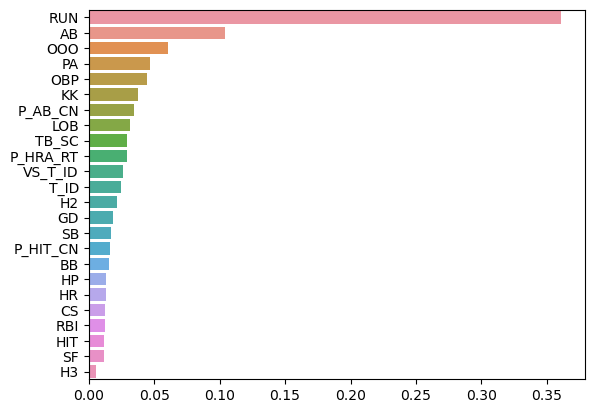

In [24]:

import seaborn as sns
import numpy as np

ftr_importances_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr = ftr_importances.sort_values(ascending=False)

sns.barplot(x=ftr, y = ftr.index)
     

## GBM 모델 Feature importance

In [29]:
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

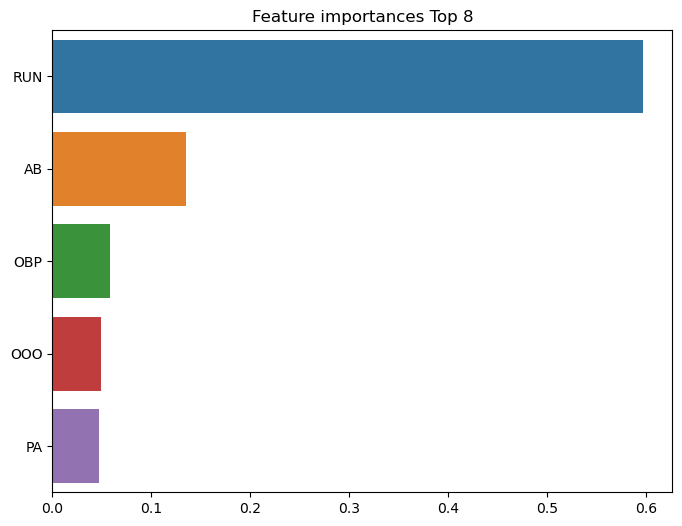

In [31]:
ftr_importances_values = gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top5 = ftr_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 8') 
sns.barplot(x = ftr_top5, y = ftr_top5.index)
plt.show()

=> corr 상관도와 feature importance를 이용하여 feature 선정
- 사용할 feature : RUN(득점),AB(타수),PA(타석),OOO(타율),T_ID(홈팀),VS_T_ID(원정팀),OBP(출루율)